# Import Library

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import ssl
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Download Data

In [2]:
ssl._create_default_https_context = ssl._create_unverified_context
Datagrep=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

# Transform Data

In [3]:
Datagrep

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22,2/6/22,2/7/22,2/8/22,2/9/22,2/10/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,163555,164190,164727,165358,165711,166191,166924,167739,168550,169448
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,258543,261240,261240,263172,263172,264624,264875,265716,266416,267020
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,253520,254885,255836,256806,257598,257976,258478,259088,259673,260191
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,35958,36315,36470,36599,36599,36599,36808,36808,36989,37074
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,98226,98267,98319,98340,98351,98364,98409,98424,98453,98474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,535160,546176,556550,556550,556550,556550,578424,586355,594037,600128
278,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,272,304,359,380,425,435,459,465,465,465
279,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11061,11113,11145,11145,11149,11166,11266,11553,11579,11604
280,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,305557,305959,306347,306777,306777,307206,307317,307636,308050,308556


In [4]:
countries_JH=Datagrep['Country/Region'].unique().tolist()
dates_JH=list(Datagrep)[4:]
print(countries_JH[0:4])
print(len(countries_JH))
print(dates_JH[-2:])
print(len(dates_JH))

['Afghanistan', 'Albania', 'Algeria', 'Andorra']
198
['2/9/22', '2/10/22']
751


In [5]:
N=[]
for c in countries_JH:
    L=Datagrep[Datagrep['Country/Region']==c][dates_JH].sum().values.tolist()
    N.append(L)
Data_df=pd.DataFrame(np.array(N).T).rename(columns={i:countries_JH[i] for i in range(len(countries_JH))}) 

In [6]:
Data_df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,166191,264624,257976,36599,98364,11,6853,8589879,389957,2752507,...,726042,228796,7,496283,2341971,556550,435,11166,307206,230402
747,166924,264875,258478,36808,98409,11,6853,8615285,391588,2779880,...,733010,229628,7,496283,2358786,578424,459,11266,307317,230402
748,167739,265716,259088,36808,98424,11,6853,8648075,394074,2811390,...,741454,230401,7,497977,2380695,586355,465,11553,307636,230603
749,168550,266416,259673,36989,98453,11,6853,8675327,396885,2822873,...,749554,231179,7,499537,2404651,594037,465,11579,308050,230740


In [7]:
Datah_nc=[]
for c in countries_JH:
    L=Data_df[c].to_list()
    L1=[]
    L1.append(L[0])
    for i in range(1,len(L)-1):
        L1.append([L[i+1]-L[i] if L[i+1]-L[i]>=0 else 0][0])
    Datah_nc.append(L1)  
Data_nc=pd.DataFrame(np.array(Datah_nc).T).rename(columns={i:countries_JH[i] for i in range(len(countries_JH))}) 
Df=Data_nc.copy()

In [8]:
Df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,480,1452,378,0,13,0,121,12664,2467,25247,...,6094,887,0,1448,14112,0,10,17,429,0
746,733,251,502,209,45,0,0,25406,1631,27373,...,6968,832,0,0,16815,21874,24,100,111,0
747,815,841,610,0,15,0,0,32790,2486,31510,...,8444,773,0,1694,21909,7931,6,287,319,201
748,811,700,585,181,29,0,0,27252,2811,11483,...,8100,778,0,1560,23956,7682,0,26,414,137


In [9]:
Df['US']

0           1
1           1
2           0
3           3
4           0
        ...  
745     80051
746    336568
747    221262
748    187299
749    147416
Name: US, Length: 750, dtype: int32

In [10]:
Data_df['US']

0             1
1             1
2             2
3             2
4             5
         ...   
746    76536029
747    76872597
748    77093859
749    77281158
750    77428574
Name: US, Length: 751, dtype: int32

# Visualize Data

<AxesSubplot:>

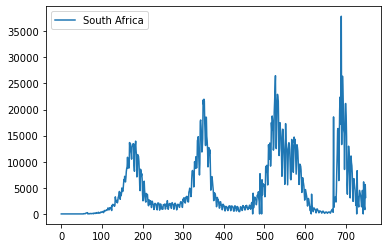

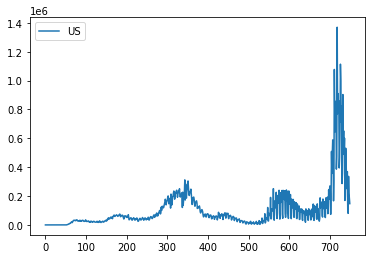

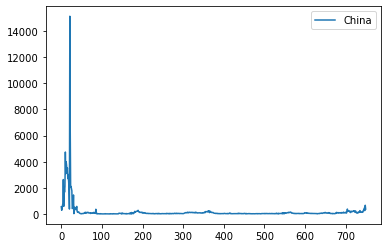

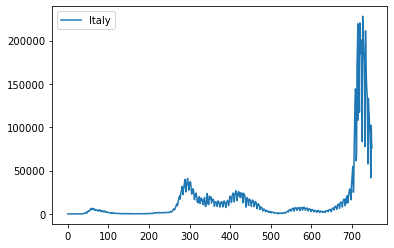

In [11]:
#Data_df['US'].plot()
#Data_df.plot()
#Data_df.plot(y=['US','China'])
Df.plot(y=['South Africa'])
Df.plot(y=['US'])
Df.plot(y=['China'])
Df.plot(y=['Italy'])
#Df.plot()

# PCA

In [12]:
X=Df.values
sc=StandardScaler()
X_std=sc.fit_transform(X)

In [13]:
X_std

array([[-5.75552406e-01, -7.55364373e-01, -9.54969510e-01, ...,
        -5.86253022e-01, -5.27288061e-01, -3.73674317e-01],
       [-5.75552406e-01, -7.55364373e-01, -9.54969510e-01, ...,
        -5.86253022e-01, -5.27288061e-01, -3.73674317e-01],
       [-5.75552406e-01, -7.55364373e-01, -9.54969510e-01, ...,
        -5.86253022e-01, -5.27288061e-01, -3.73674317e-01],
       ...,
       [ 1.50054055e+00,  1.02894421e+00,  7.24176006e-01, ...,
         1.02875913e+01, -1.18436285e-01, -1.29863979e-01],
       [ 1.49035114e+00,  7.29791405e-01,  6.55358566e-01, ...,
         3.98833917e-01,  3.32208089e-03, -2.07495132e-01],
       [ 1.71197088e+00,  5.26112899e-01,  4.70927829e-01, ...,
         3.60945958e-01,  1.21235446e-01, -9.77829057e-03]])

In [14]:
pca=PCA()
X_pca=pca.fit_transform(X_std)

Text(0, 0.5, 'cumulative variance explained')

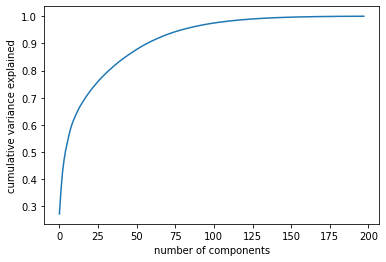

In [15]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative variance explained')

In [16]:
pca = PCA(n_components = 0.99)
X_pca = pca.fit_transform(X_std) # fit and reduce dimensions
print(pca.n_components_) # print and see how many components are selected

126


In [17]:
pd.DataFrame(pca.components_, columns = Df.columns)

,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,0.006790,0.087290,0.075711,0.065846,0.046884,0.001829,0.060993,0.106797,0.063714,0.104742,...,0.115922,0.071543,0.001309,0.060341,0.089199,0.059113,0.071293,0.044809,0.044764,0.019168
1,0.029275,0.016287,0.037572,0.041585,0.110606,-0.000410,0.006559,0.083694,-0.125389,0.073109,...,-0.019690,0.026787,-0.009055,-0.006053,0.048080,-0.067063,-0.090142,-0.032783,0.154893,0.083828
2,-0.109585,0.038997,-0.117195,0.074310,0.050682,0.008497,0.000105,0.043650,-0.033690,0.089584,...,0.004064,-0.157554,0.005839,-0.112404,-0.012917,-0.034039,-0.036960,-0.045603,0.033644,-0.029345
3,0.141080,-0.056258,0.062230,0.012354,-0.063433,-0.024256,-0.039862,0.126053,-0.082789,0.042193,...,0.128940,0.020153,-0.021226,0.028754,-0.156897,-0.032514,0.041110,-0.002066,0.012048,-0.072439
4,0.126583,-0.085290,0.058771,0.006933,-0.001052,0.028837,-0.066593,-0.051250,-0.031843,-0.058425,...,-0.027468,-0.063821,-0.008755,-0.073440,0.006126,-0.013666,0.069155,-0.120113,0.168567,0.167867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0.204228,-0.216675,0.007961,0.001210,-0.003104,0.023764,0.058282,-0.046054,-0.043567,-0.002343,...,-0.000367,0.209835,-0.003176,-0.032388,-0.033892,0.055623,0.038872,0.056347,0.050478,-0.010292
122,-0.058965,0.027227,0.110777,-0.073139,0.049106,0.047634,-0.097022,-0.017889,0.090848,0.049894,...,-0.059800,-0.063409,-0.002736,0.066858,0.094248,-0.077587,-0.025704,-0.055386,-0.002648,0.029223
123,0.141447,-0.002850,-0.037718,-0.004310,-0.084396,-0.014667,-0.046208,-0.043147,-0.001058,0.077863,...,-0.046547,0.143978,-0.003033,0.062163,0.028322,0.072215,-0.059997,-0.105366,0.026336,0.021045
124,-0.084972,0.067597,-0.082723,-0.001842,0.086402,0.029667,0.005771,-0.027274,-0.018381,0.044360,...,0.006404,-0.003824,-0.013423,0.017513,0.013235,-0.090976,-0.070783,-0.017306,0.027623,0.107347


In [18]:
n_pcs= pca.n_components_ # get number of component
n_pcs=50

# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = Df.columns

# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [19]:
n_pcs

50

In [20]:
most_important_names

['Denmark',
 'Mozambique',
 'Iran',
 'Colombia',
 'Philippines',
 'Iceland',
 'Bosnia and Herzegovina',
 'Ethiopia',
 'Kiribati',
 'Haiti',
 'Nigeria',
 'Eswatini',
 'Niger',
 'Congo (Kinshasa)',
 'El Salvador',
 'Madagascar',
 'Uganda',
 'Saint Vincent and the Grenadines',
 'Summer Olympics 2020',
 'Antigua and Barbuda',
 'Antarctica',
 'Tonga',
 'Tanzania',
 'Vanuatu',
 'Marshall Islands',
 'Marshall Islands',
 'Vanuatu',
 'Cameroon',
 'El Salvador',
 'Diamond Princess',
 'Tanzania',
 'Lesotho',
 'Tanzania',
 'MS Zaandam',
 'MS Zaandam',
 'Micronesia',
 'Holy See',
 'Lesotho',
 'Kyrgyzstan',
 'Equatorial Guinea',
 'Nicaragua',
 'Marshall Islands',
 'Benin',
 'Liberia',
 'Dominica',
 'Cameroon',
 'Turkey',
 'Kazakhstan',
 'Chad',
 'Diamond Princess']

# Regression

In [21]:
#define URL where data is located
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

#read in data
data_full = pd.read_csv(url)

#view first six rows of data
data_full[0:6]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22,2/6/22,2/7/22,2/8/22,2/9/22,2/10/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,163555,164190,164727,165358,165711,166191,166924,167739,168550,169448
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,258543,261240,261240,263172,263172,264624,264875,265716,266416,267020
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,253520,254885,255836,256806,257598,257976,258478,259088,259673,260191
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,35958,36315,36470,36599,36599,36599,36808,36808,36989,37074
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,98226,98267,98319,98340,98351,98364,98409,98424,98453,98474
5,NaN,Antarctica,-71.94990,23.347000,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11


Text(0.5, 1.0, 'US')

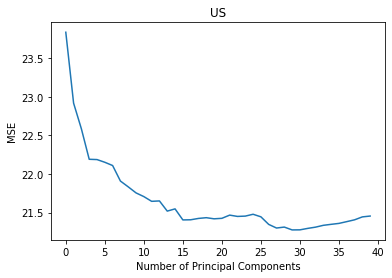

In [43]:
# define predictor and response variables
X = Df
y = Df[['US']]

#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 40):
    score = -1*model_selection.cross_val_score(regr, 
                       X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(np.log(mse))
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('US')

In [46]:
score = -1*model_selection.cross_val_score(regr, 
                       X_reduced[:,:29], y, cv=cv, scoring='neg_mean_squared_error').mean()
print(score)

1738466526.709399


In [47]:
regr = LinearRegression()
regr.fit(X_reduced[:,:29], y)

#calculate RMSE
pred = regr.predict(X_reduced[:,:29])

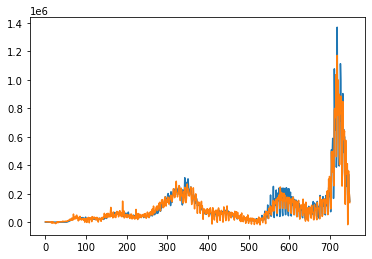

In [48]:
plt.plot(y)
plt.plot(pred)
plt.show()

In [49]:
print(len(y))

print(X_reduced.shape)

750
(750, 198)


In [50]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([27.24, 35.83, 42.63, 47.11, 50.57, 53.21, 55.76, 58.16, 60.01,
       61.55, 62.88, 64.17, 65.36, 66.47, 67.44, 68.36, 69.26, 70.13,
       70.97, 71.77, 72.54, 73.28, 73.98, 74.67, 75.34, 76.  , 76.64,
       77.25, 77.83, 78.41, 78.97, 79.52, 80.04, 80.56, 81.06, 81.56,
       82.05, 82.53, 83.  , 83.45, 83.89, 84.31, 84.73, 85.14, 85.54,
       85.93, 86.31, 86.69, 87.06, 87.42, 87.78, 88.14, 88.49, 88.83,
       89.16, 89.48, 89.79, 90.09, 90.38, 90.66, 90.93, 91.2 , 91.46,
       91.72, 91.97, 92.22, 92.46, 92.69, 92.92, 93.14, 93.35, 93.55,
       93.75, 93.95, 94.14, 94.32, 94.5 , 94.67, 94.83, 94.99, 95.14,
       95.29, 95.44, 95.59, 95.73, 95.86, 95.99, 96.12, 96.24, 96.36,
       96.48, 96.6 , 96.71, 96.82, 96.93, 97.03, 97.13, 97.23, 97.32,
       97.41, 97.5 , 97.58, 97.66, 97.74, 97.82, 97.89, 97.96, 98.03,
       98.1 , 98.17, 98.23, 98.29, 98.35, 98.41, 98.47, 98.53, 98.58,
       98.63, 98.68, 98.73, 98.78, 98.83, 98.87, 98.91, 98.95, 98.99,
       99.03, 99.07,

In [51]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

#calculate RMSE
pred = regr.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, pred))

78665.57850080005

# PCA  Prediction 

In [99]:
lag=7
X_shift=X
y_shift=y.shift(periods=-lag)
print(len(y_shift))
print(type(y))
print(type(y_shift))

750
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [100]:
print(y[-(lag+1):])
print(y_shift[-(lag+1):])

         US
742  251066
743  369281
744  104104
745   80051
746  336568
747  221262
748  187299
749  147416
           US
742  147416.0
743       NaN
744       NaN
745       NaN
746       NaN
747       NaN
748       NaN
749       NaN


In [101]:
print(X_shift.shape)
print(y_shift.shape)

(750, 198)
(750, 1)


In [102]:
# define predictor and response variables
Xall = X_shift
yall = y_shift

#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(Xall))

In [103]:
print(X_shift.shape)
print(Xall.shape)
print(yall.shape)
print(X_reduced.shape)

(750, 198)
(750, 198)
(750, 1)
(750, 198)


In [104]:
print(type(Xall))
print(type(X_reduced))
print(type(yall))
X_trainreduced=X_reduced[0:-lag,:]
y_train=y.iloc[0:-lag,:].to_numpy()
print(type(X_trainreduced))
print(X_trainreduced.shape)
print(type(y_train))
print(y_train.shape)
X_testreduced=X_reduced[-(lag+1):,:]
y_test=y.iloc[-(lag+1):,:].to_numpy()
print(type(X_testreduced))
print(X_testreduced.shape)
print(y_test.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(743, 198)
<class 'numpy.ndarray'>
(743, 1)
<class 'numpy.ndarray'>
(8, 198)
(8, 1)


Text(0.5, 1.0, 'US')

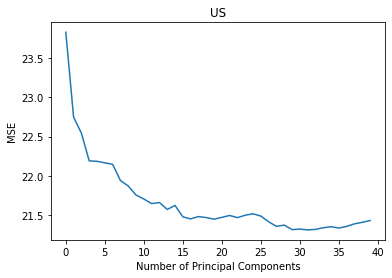

In [105]:
#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_trainreduced),1)), y_train, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 40):
    score = -1*model_selection.cross_val_score(regr, 
                       X_trainreduced[:,:i], y_train, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(np.log(mse))
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('US')

In [106]:
score = -1*model_selection.cross_val_score(regr, 
                       X_trainreduced[:,:31], y_train, cv=cv, scoring='neg_mean_squared_error').mean()
print(score)

1793260947.940088


In [107]:
regr = LinearRegression()
regr.fit(X_trainreduced[:,:31], y_train)

#calculate RMSE
trainpred = regr.predict(X_trainreduced[:,:31])

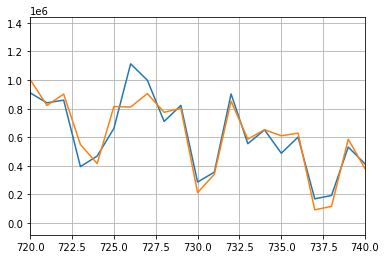

In [108]:
plt.plot(y_train)
plt.plot(trainpred)
plt.xlim(720, 740)
plt.grid()
plt.show()

In [109]:
predres = regr.predict(X_testreduced[:,:31])
print(predres)
print(y_test)

[[345871.39401697]
 [391743.94465863]
 [-99489.45645836]
 [ 33634.52217633]
 [369731.72451695]
 [215321.71563044]
 [172045.40063191]
 [119290.53797816]]
[[251066]
 [369281]
 [104104]
 [ 80051]
 [336568]
 [221262]
 [187299]
 [147416]]


In [110]:
asx=np.linspace(len(yall)-lag-1,len(yall)-1,lag+1)

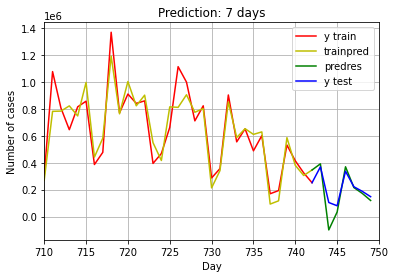

In [112]:
plt.plot(y_train, "-r", label='y train')
plt.plot(trainpred, "-y", label='trainpred')
plt.plot(asx,predres, "-g", label='predres')
plt.plot(asx,y_test, "-b", label='y test')
plt.legend(('y train','trainpred', 'predres', 'y test'))
plt.legend(loc = "upper right")
plt.title("Prediction: 7 days")
plt.xlabel("Day")
plt.ylabel("Number of cases")
plt.xlim(710, 750)
plt.grid() 
plt.show()

In [72]:
lag=30
X_shift=X
y_shift=y.shift(periods=-lag)
print(len(y_shift))
print(type(y))
print(type(y_shift))

750
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [73]:
# define predictor and response variables
Xall = X_shift
yall = y_shift

#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(Xall))

In [75]:
X_trainreduced=X_reduced[0:-lag,:]
y_train=y.iloc[0:-lag,:].to_numpy()
X_testreduced=X_reduced[-(lag+1):,:]
y_test=y.iloc[-(lag+1):,:].to_numpy()

Text(0.5, 1.0, 'US')

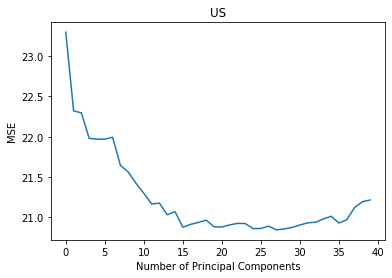

In [76]:
#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_trainreduced),1)), y_train, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 40):
    score = -1*model_selection.cross_val_score(regr, 
                       X_trainreduced[:,:i], y_train, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(np.log(mse))
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('US')

In [86]:
score = -1*model_selection.cross_val_score(regr, 
                       X_trainreduced[:,:27], y_train, cv=cv, scoring='neg_mean_squared_error').mean()
print(score)

1127653208.2262616


In [87]:
regr = LinearRegression()
regr.fit(X_trainreduced[:,:27], y_train)

#calculate RMSE
trainpred = regr.predict(X_trainreduced[:,:27])

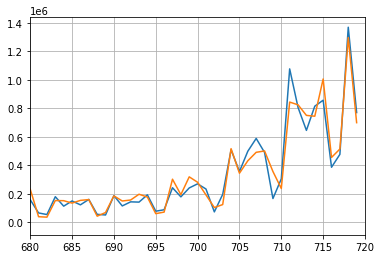

In [97]:
plt.plot(y_train)
plt.plot(trainpred)
plt.xlim(680, 720)
plt.grid()
plt.show()

In [90]:
predres = regr.predict(X_testreduced[:,:27])

In [91]:
asx=np.linspace(len(yall)-lag-1,len(yall)-1,lag+1)

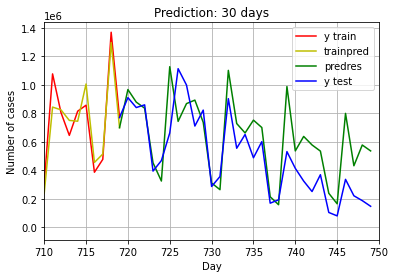

In [94]:
plt.plot(y_train, "-r", label='y train')
plt.plot(trainpred, "-y", label='trainpred')
plt.plot(asx,predres, "-g", label='predres')
plt.plot(asx,y_test, "-b", label='y test')
plt.legend(('y train','trainpred', 'predres', 'y test'))
plt.legend(loc = "upper right")
plt.title("Prediction: 30 days")
plt.xlabel("Day")
plt.ylabel("Number of cases")
plt.xlim(710, 750)
plt.grid() 
plt.show()

# Appendix

In [ ]:
# load dataset into Pandas DataFrame
#df = pd.read_csv('datasaved.csv', names=['Unnamed:', '1/22/21', '1/23/21', '1/24/20','target'])
df = pd.read_csv('datasaved.csv')

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
# Standardize data
features = ['Unnamed:', '1/22/21', '1/23/21', '1/24/20']
# Separating out the features
x = df.loc[:, features].values

In [ ]:
# Separating out the target
y = df.loc[:,['target']].values

In [ ]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
type(x)

In [ ]:
print(x)

In [ ]:
pd.DataFrame(data = x, columns = features).head()

In [ ]:
# PCA projection to 2D
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf.head(5)

In [ ]:
df[['target']].head()

In [ ]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)

In [ ]:
# Visualize 2D projection
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
# Explained variance
pca.explained_variance_ratio_